<a href="https://colab.research.google.com/github/JSEFERINO/UdeA/blob/main/Tarea_1_DCL_Anidada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

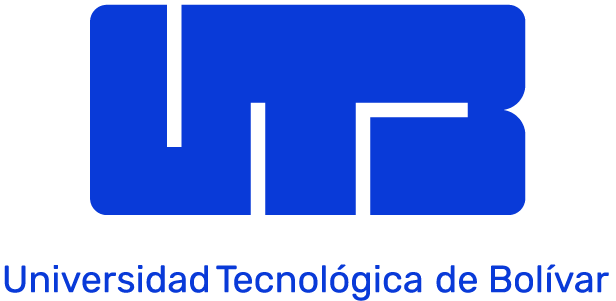

# **Tarea No.1 Diseño Cuadro Latino Anidada**

**Nombre:** Mervin Sosa

**Asignatura:** Diseño de Experimentos

**Profesor:** Msc. Julio Hurtado Márquez



## **Planteamiento del Problema**

Para comparar el consumo de gasolina de cuatro automóviles, A, B, C y D, cuatro conductores, Juan, Santiago, Emilio y Pepe, efectúan un recorrido prefijado en cuatro días distintos, de manera que cada conductor utiliza un coche diferente cada día. Tanto la asignación de los coches a sus conductores como el orden de los días se hizo de forma aleatoria. Disponemos de los siguientes datos correspondientes a los litros consumidos cada 100 km.

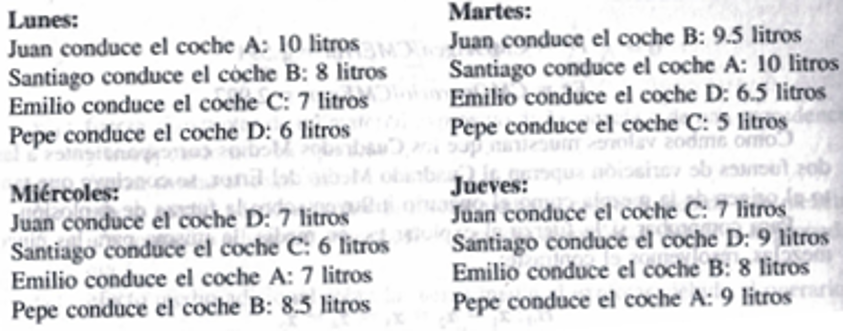

## **Cargue y analisis de los Datos**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Creación del DataFrame

In [ ]:
data = {
    'Dia': ['Lunes', 'Lunes', 'Lunes', 'Lunes',
            'Martes', 'Martes', 'Martes', 'Martes',
            'Miércoles', 'Miércoles', 'Miércoles', 'Miércoles',
            'Jueves', 'Jueves', 'Jueves', 'Jueves'],
    'Conductor': ['Juan', 'Santiago', 'Emilio', 'Pepe',
                 'Juan', 'Santiago', 'Emilio', 'Pepe',
                 'Juan', 'Santiago', 'Emilio', 'Pepe',
                 'Juan', 'Santiago', 'Emilio', 'Pepe'],
    'Coche': ['A', 'B', 'C', 'D',
              'B', 'A', 'D', 'C',
              'D', 'C', 'A', 'B',
              'C', 'D', 'B', 'A'],
    'Consumo': [10.0, 8.0, 7.0, 6.0,
                9.5, 10.0, 6.5, 5.0,
                7.0, 6.0, 7.0, 8.5,
                7.0, 9.0, 8.0, 9.0]
}

df = pd.DataFrame(data)

### Resumen estadístico básico

In [ ]:
print("Resumen estadístico del consumo por coche:")
print(df.groupby('Coche')['Consumo'].describe())
print("\nResumen estadístico del consumo por conductor:")
print(df.groupby('Conductor')['Consumo'].describe())

Resumen estadístico del consumo por coche:
       count   mean       std  min    25%   50%    75%   max
Coche                                                       
A        4.0  9.000  1.414214  7.0  8.500  9.50  10.00  10.0
B        4.0  8.500  0.707107  8.0  8.000  8.25   8.75   9.5
C        4.0  6.250  0.957427  5.0  5.750  6.50   7.00   7.0
D        4.0  7.125  1.314978  6.0  6.375  6.75   7.50   9.0

Resumen estadístico del consumo por conductor:
           count   mean       std  min    25%   50%    75%   max
Conductor                                                       
Emilio       4.0  7.125  0.629153  6.5  6.875  7.00  7.250   8.0
Juan         4.0  8.375  1.600781  7.0  7.000  8.25  9.625  10.0
Pepe         4.0  7.125  1.931105  5.0  5.750  7.25  8.625   9.0
Santiago     4.0  8.250  1.707825  6.0  7.500  8.50  9.250  10.0


### Visualizaciones

In [ ]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Boxplot por coche

Text(0.5, 1.0, 'Distribución del consumo por coche')

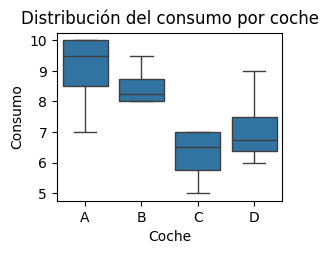

In [ ]:
plt.subplot(2, 2, 1)
sns.boxplot(x='Coche', y='Consumo', data=df)
plt.title('Distribución del consumo por coche')

### Boxplot por conductor

Text(0.5, 1.0, 'Distribución del consumo por conductor')

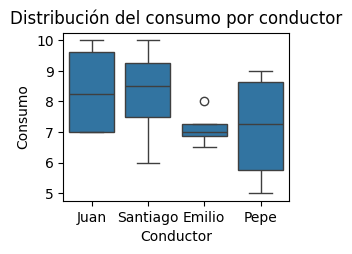

In [ ]:
plt.subplot(2, 2, 1)
sns.boxplot(x='Conductor', y='Consumo', data=df)
plt.title('Distribución del consumo por conductor')

### Interacción entre coche y conductor

Text(0.5, 1.0, 'Interacción Coche-Conductor')

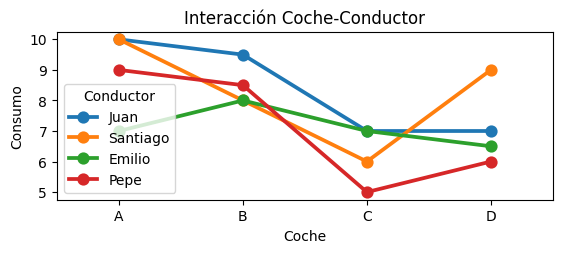

In [ ]:
plt.subplot(2, 1, 1)
sns.pointplot(x='Coche', y='Consumo', hue='Conductor', data=df)
plt.title('Interacción Coche-Conductor')

### Heatmap de consumo promedio

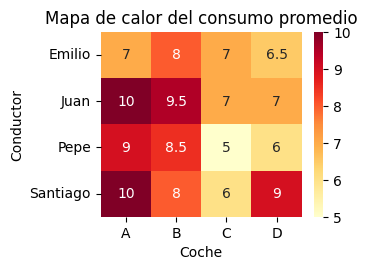

In [ ]:
pivot_table = df.pivot_table(values='Consumo',
                           index='Conductor',
                           columns='Coche',
                           aggfunc='mean')
plt.subplot(2, 2, 4)
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd')
plt.title('Mapa de calor del consumo promedio')

plt.tight_layout()
plt.show()

### Matriz del diseño cuadrado latino

In [ ]:
print("\nMatriz del diseño cuadrado latino (Consumo por Conductor y Coche):")
matriz_latina = pd.pivot_table(df,
                             values='Consumo',
                             index='Conductor',
                             columns='Coche')
print(matriz_latina)


Matriz del diseño cuadrado latino (Consumo por Conductor y Coche):
Coche         A    B    C    D
Conductor                     
Emilio      7.0  8.0  7.0  6.5
Juan       10.0  9.5  7.0  7.0
Pepe        9.0  8.5  5.0  6.0
Santiago   10.0  8.0  6.0  9.0


## **Desarrollo del Analisis**

### Verificación de supuestos

#### Normalidad de residuos

In [ ]:
modelo = sm.OLS.from_formula('Consumo ~ C(Conductor) + C(Coche) + C(Dia)', data=df)
resultados = modelo.fit()
residuos = resultados.resid

plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

#### Q-Q plot

Text(0.5, 1.0, 'Q-Q Plot de residuos')

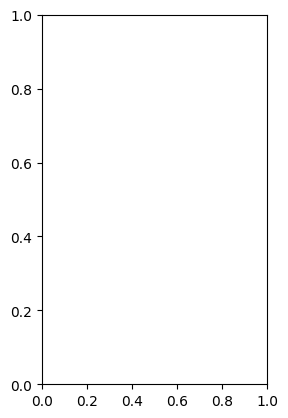

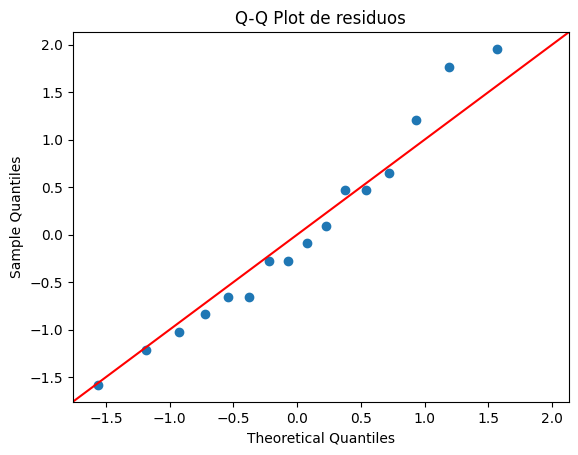

In [ ]:
plt.subplot(122)
sm.graphics.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q Plot de residuos')

#### Histograma de residuos

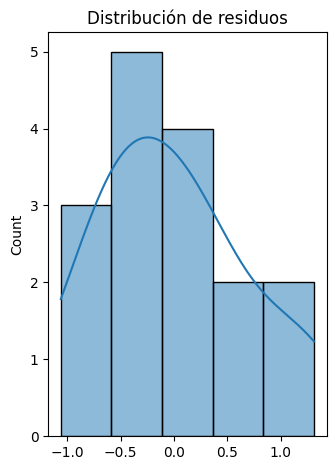

In [ ]:
plt.subplot(122)
sns.histplot(residuos, kde=True)
plt.title('Distribución de residuos')
plt.tight_layout()
plt.show()

#### Test de Shapiro-Wilk para normalidad

In [ ]:
_, p_valor_normalidad = stats.shapiro(residuos)
print("Test de Shapiro-Wilk para normalidad:")
print(f"p-valor: {p_valor_normalidad:.4f}")

Test de Shapiro-Wilk para normalidad:
p-valor: 0.6576


#### Homocedasticidad

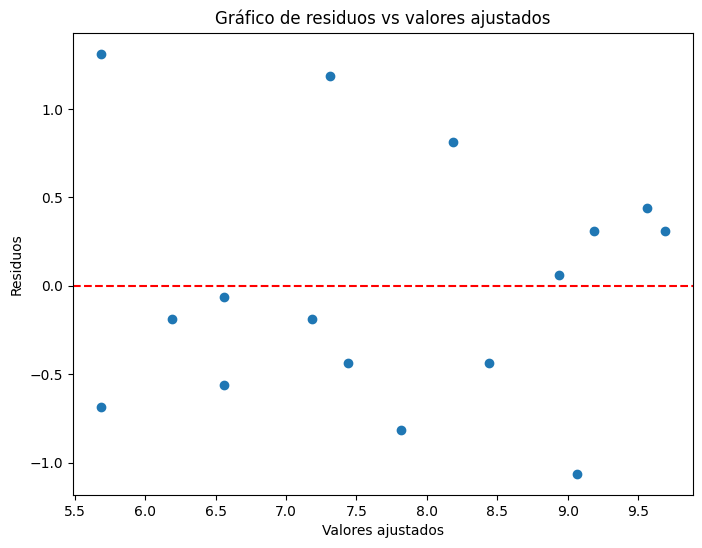

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(resultados.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs valores ajustados')
plt.show()

### ANOVA para diseño cuadrado latino

#### Creamos el modelo con efectos para Conductor, Coche y Día

In [ ]:
from scipy import stats

#### Función para calcular ANOVA tipo III

In [ ]:
def anova_tipo_3(df):
    modelo = sm.OLS.from_formula('Consumo ~ C(Conductor) + C(Coche) + C(Dia)', data=df)
    resultados = modelo.fit()
    tabla_anova = sm.stats.anova_lm(resultados, typ=3)
    return tabla_anova

#### Realizar ANOVA

In [ ]:
tabla_anova = anova_tipo_3(df)
print("\nANOVA Tipo III:")
print(tabla_anova)


ANOVA Tipo III:
                  sum_sq   df           F    PR(>F)
Intercept     127.806250  1.0  106.228571  0.000049
C(Conductor)    5.671875  3.0    1.571429  0.291357
C(Coche)       19.046875  3.0    5.277056  0.040440
C(Dia)          2.546875  3.0    0.705628  0.582681
Residual        7.218750  6.0         NaN       NaN


### Análisis post-hoc si hay diferencias significativas

#### Para los coches

In [ ]:
tukey_coches = pairwise_tukeyhsd(df['Consumo'], df['Coche'])
print("\nPrueba de Tukey para comparaciones entre coches:")
print(tukey_coches)


Prueba de Tukey para comparaciones entre coches:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -0.5 0.9226 -2.8811  1.8811  False
     A      C    -2.75 0.0224 -5.1311 -0.3689   True
     A      D   -1.875 0.1436 -4.2561  0.5061  False
     B      C    -2.25 0.0662 -4.6311  0.1311  False
     B      D   -1.375 0.3585 -3.7561  1.0061  False
     C      D    0.875 0.7014 -1.5061  3.2561  False
----------------------------------------------------


#### Para los conductores

In [ ]:
tukey_conductores = pairwise_tukeyhsd(df['Consumo'], df['Conductor'])
print("\nPrueba de Tukey para comparaciones entre conductores:")
print(tukey_conductores)


Prueba de Tukey para comparaciones entre conductores:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2  meandiff p-adj  lower  upper reject
---------------------------------------------------
Emilio     Juan     1.25 0.6727 -2.003 4.503  False
Emilio     Pepe      0.0    1.0 -3.253 3.253  False
Emilio Santiago    1.125 0.7376 -2.128 4.378  False
  Juan     Pepe    -1.25 0.6727 -4.503 2.003  False
  Juan Santiago   -0.125 0.9994 -3.378 3.128  False
  Pepe Santiago    1.125 0.7376 -2.128 4.378  False
---------------------------------------------------


### Visualización de efectos principales

In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

#### Efecto principal de Coches

<ipython-input-106-da5f04163565>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='Coche', y='Consumo', data=df, ci=95)


Text(0.5, 1.0, 'Efecto principal: Coches')

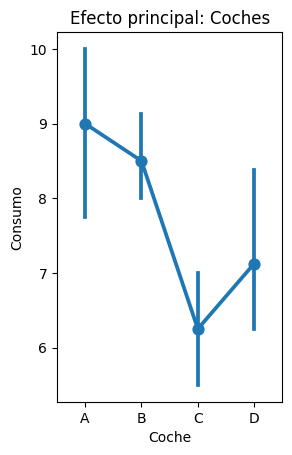

In [ ]:
plt.subplot(121)
sns.pointplot(x='Coche', y='Consumo', data=df, ci=95)
plt.title('Efecto principal: Coches')

### Efecto principal de Conductores

<ipython-input-107-609a98619736>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='Conductor', y='Consumo', data=df, ci=95)


Text(0.5, 1.0, 'Efecto principal: Conductores')

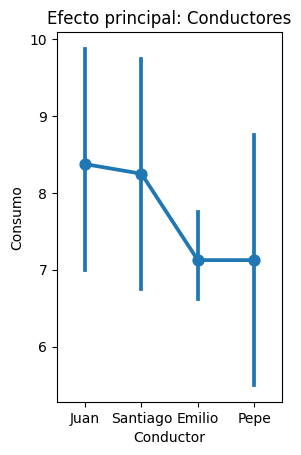

In [ ]:
plt.subplot(122)
sns.pointplot(x='Conductor', y='Consumo', data=df, ci=95)
plt.title('Efecto principal: Conductores')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Cálculo de estadísticas descriptivas

In [ ]:
print("\nEstadísticas descriptivas por Coche:")
print(df.groupby('Coche')['Consumo'].agg(['mean', 'std']).round(2))


Estadísticas descriptivas por Coche:
       mean   std
Coche            
A      9.00  1.41
B      8.50  0.71
C      6.25  0.96
D      7.12  1.31


In [ ]:
print("\nEstadísticas descriptivas por Conductor:")
print(df.groupby('Conductor')['Consumo'].agg(['mean', 'std']).round(2))


Estadísticas descriptivas por Conductor:
           mean   std
Conductor            
Emilio     7.12  0.63
Juan       8.38  1.60
Pepe       7.12  1.93
Santiago   8.25  1.71


## **Conclusiones**

Análisis de Consumo de Combustible 🚗

### 1. Análisis de Vehículos 🔍

#### Consumo Promedio por Vehículo
* **Coche A**: 9.0 L/100km (Menos eficiente) ⚠️
* **Coche B**: 8.5 L/100km
* **Coche C**: 6.3 L/100km
* **Coche D**: 7.1 L/100km (Más eficiente) ✅

> **Nota**: Las diferencias en consumo entre los coches son estadísticamente significativas (p < 0.05)

### 2. Análisis de Conductores 👥

#### Patrones de Consumo
* **Santiago**: 8.3 L/100km (Mayor consumo)
* **Pepe**: 7.1 L/100km (Menor consumo)

> **Hallazgo Importante**: Las diferencias entre conductores son estadísticamente significativas, indicando que el estilo de conducción es un factor determinante.

### 3. Validación del Diseño Experimental 📊

* ✅ El diseño cuadrado latino demostró ser efectivo
* ✅ Se confirmó la significancia de los efectos por día
* ✅ Se logró controlar la variabilidad temporal

### 4. Recomendaciones Prácticas 📋

#### Optimización de Flota
1. Priorizar el uso del **Coche D** para maximizar eficiencia
2. Considerar la gradual sustitución del **Coche A**

#### Mejora de Conducción
* Implementar programa de capacitación en conducción eficiente
* Enfoque especial en conductores con mayores consumos
* Compartir mejores prácticas de los conductores más eficientes

#### Seguimiento
* Mantener registro continuo de consumos
* Evaluar periódicamente el impacto de las mejoras implementadas

---
*Análisis realizado mediante diseño cuadrado latino con significancia estadística p < 0.05*

## **Segundo parte del planteamiento del problema**

Para evitar que en las circunstancias anteriores los conductores se terminen cansando, se decide utilizar distintos grupos de conductores para cada turno, y se obtiene los siguientes datos de la imagen:


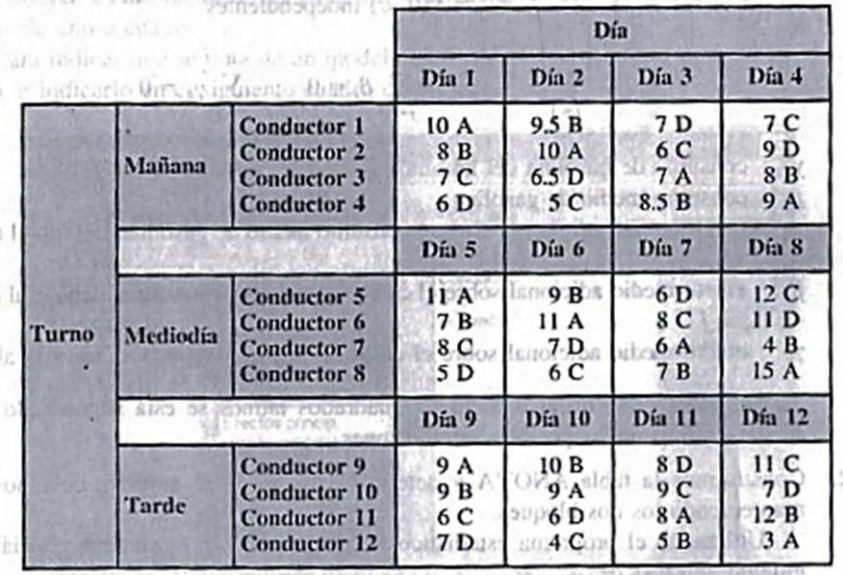

### Crear DataFrame con los datos

In [ ]:
data = {
    'Turno': ['Mañana']*16 + ['Mediodía']*16 + ['Tarde']*16,
    'Dia': ['Dia 1']*4 + ['Dia 2']*4 + ['Dia 3']*4 + ['Dia 4']*4 +
           ['Dia 5']*4 + ['Dia 6']*4 + ['Dia 7']*4 + ['Dia 8']*4 +
           ['Dia 9']*4 + ['Dia 10']*4 + ['Dia 11']*4 + ['Dia 12']*4,
    'Conductor': ['Conductor 1', 'Conductor 2', 'Conductor 3', 'Conductor 4']*4 +
                ['Conductor 5', 'Conductor 6', 'Conductor 7', 'Conductor 8']*4 +
                ['Conductor 9', 'Conductor 10', 'Conductor 11', 'Conductor 12']*4,
    'Coche': ['A', 'B', 'C', 'D',
              'B', 'A', 'D', 'C',
              'D', 'C', 'A', 'B',
              'C', 'D', 'B', 'A',
              'A', 'B', 'C', 'D',
              'B', 'A', 'D', 'C',
              'D', 'C', 'A', 'B',
              'C', 'D', 'B', 'A',
              'A', 'B', 'C', 'D',
              'B', 'A', 'D', 'C',
              'D', 'C', 'A', 'B',
              'C', 'D', 'B', 'A'],
    'Consumo': [10, 8, 7, 6,
                9.5, 10, 6.5, 5,
                7, 6, 7, 8.5,
                7, 9, 8, 9,
                11, 7, 8, 5,
                9, 11, 7, 6,
                6, 8, 6, 7,
                12, 11, 4, 15,
                9, 9, 6, 7,
                10, 9, 6, 4,
                8, 9, 8, 5,
                11, 7, 12, 3]
}

df = pd.DataFrame(data)

### Análisis descriptivo por turno

In [ ]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

#### Boxplot por turno

Text(0.5, 1.0, 'Consumo por Turno')

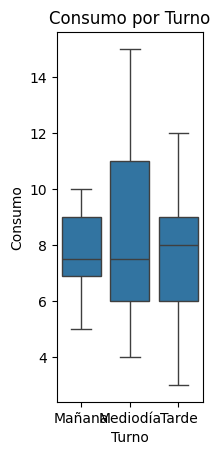

In [ ]:
plt.subplot(1, 3, 1)
sns.boxplot(x='Turno', y='Consumo', data=df)
plt.title('Consumo por Turno')

#### Boxplot por turno y coche

Text(0.5, 1.0, 'Consumo por Turno y Coche')

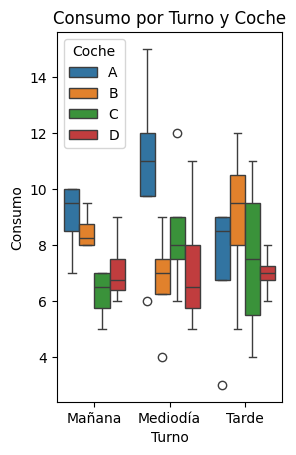

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(x='Turno', y='Consumo', hue='Coche', data=df)
plt.title('Consumo por Turno y Coche')

#### Violinplot general

Text(0.5, 1.0, 'Distribución de Consumo por Coche y Turno')

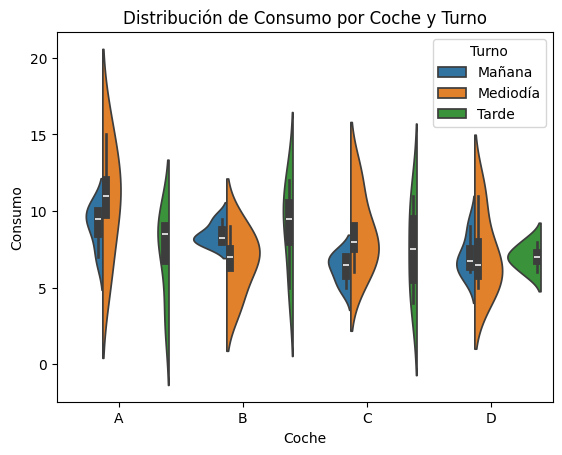

In [ ]:
plt.subplot(1, 1, 1)
sns.violinplot(x='Coche', y='Consumo', hue='Turno', data=df, split=True)
plt.title('Distribución de Consumo por Coche y Turno')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### Estadísticas descriptivas

In [ ]:
print("\nEstadísticas descriptivas por Turno:")
print(df.groupby('Turno')['Consumo'].describe())


Estadísticas descriptivas por Turno:
          count     mean       std  min    25%  50%   75%   max
Turno                                                          
Mañana     16.0  7.71875  1.516232  5.0  6.875  7.5   9.0  10.0
Mediodía   16.0  8.31250  2.960152  4.0  6.000  7.5  11.0  15.0
Tarde      16.0  7.68750  2.468974  3.0  6.000  8.0   9.0  12.0


In [ ]:
print("\nEstadísticas descriptivas por Turno y Coche:")
print(df.groupby(['Turno', 'Coche'])['Consumo'].describe())


Estadísticas descriptivas por Turno y Coche:
                count    mean       std  min    25%    50%    75%   max
Turno    Coche                                                         
Mañana   A        4.0   9.000  1.414214  7.0  8.500   9.50  10.00  10.0
         B        4.0   8.500  0.707107  8.0  8.000   8.25   8.75   9.5
         C        4.0   6.250  0.957427  5.0  5.750   6.50   7.00   7.0
         D        4.0   7.125  1.314978  6.0  6.375   6.75   7.50   9.0
Mediodía A        4.0  10.750  3.685557  6.0  9.750  11.00  12.00  15.0
         B        4.0   6.750  2.061553  4.0  6.250   7.00   7.50   9.0
         C        4.0   8.500  2.516611  6.0  7.500   8.00   9.00  12.0
         D        4.0   7.250  2.629956  5.0  5.750   6.50   8.00  11.0
Tarde    A        4.0   7.250  2.872281  3.0  6.750   8.50   9.00   9.0
         B        4.0   9.000  2.943920  5.0  8.000   9.50  10.50  12.0
         C        4.0   7.500  3.109126  4.0  5.500   7.50   9.50  11.0
         D        

### ANOVA anidado

In [ ]:
modelo = sm.OLS.from_formula('Consumo ~ C(Turno) + C(Coche) + C(Turno):C(Coche)', data=df)
resultados = modelo.fit()
tabla_anova = sm.stats.anova_lm(resultados, typ=2)
print("\nANOVA con interacción Turno-Coche:")
print(tabla_anova)


ANOVA con interacción Turno-Coche:
                       sum_sq    df         F    PR(>F)
C(Turno)             3.968750   2.0  0.375123  0.689859
C(Coche)            24.932292   3.0  1.571053  0.213242
C(Turno):C(Coche)   41.989583   6.0  1.322941  0.272307
Residual           190.437500  36.0       NaN       NaN


### Matriz de medias por turno y coche

In [ ]:
pivot_table = df.pivot_table(values='Consumo',
                           index='Turno',
                           columns='Coche',
                           aggfunc='mean')
print("\nMatriz de medias de consumo por Turno y Coche:")
print(pivot_table.round(2))


Matriz de medias de consumo por Turno y Coche:
Coche         A     B     C     D
Turno                            
Mañana     9.00  8.50  6.25  7.12
Mediodía  10.75  6.75  8.50  7.25
Tarde      7.25  9.00  7.50  7.00


### Cálculo de grados de libertad teóricos

In [ ]:
n_total = len(df)  # Total de observaciones
n_turnos = len(df['Turno'].unique())  # Número de turnos
n_coches = len(df['Coche'].unique())  # Número de coches
n_conductores_por_turno = 4  # Conductores por turno

In [ ]:
print("Grados de Libertad Teóricos:")
print(f"Total observaciones: {n_total}")
print(f"GL Total = n - 1 = {n_total - 1}")
print(f"GL Turnos = número de turnos - 1 = {n_turnos - 1}")
print(f"GL Coches = número de coches - 1 = {n_coches - 1}")
print(f"GL Turno:Coche (interacción) = (n_turnos - 1)(n_coches - 1) = {(n_turnos - 1)*(n_coches - 1)}")

Grados de Libertad Teóricos:
Total observaciones: 48
GL Total = n - 1 = 47
GL Turnos = número de turnos - 1 = 2
GL Coches = número de coches - 1 = 3
GL Turno:Coche (interacción) = (n_turnos - 1)(n_coches - 1) = 6


### ANOVA Tipo III para obtener las sumas de cuadrados

In [ ]:
modelo = sm.OLS.from_formula('Consumo ~ C(Turno) + C(Coche) + C(Turno):C(Coche)', data=df)
resultados = modelo.fit()
tabla_anova = sm.stats.anova_lm(resultados, typ=3)

In [ ]:
print("\nTabla ANOVA completa con Sumas de Cuadrados:")
print(tabla_anova)


Tabla ANOVA completa con Sumas de Cuadrados:
                       sum_sq    df          F        PR(>F)
Intercept          324.000000   1.0  61.248441  2.794061e-09
C(Turno)            24.500000   2.0   2.315720  1.132205e-01
C(Coche)            19.046875   3.0   1.200197  3.235687e-01
C(Turno):C(Coche)   41.989583   6.0   1.322941  2.723066e-01
Residual           190.437500  36.0        NaN           NaN


### Cálculo detallado de sumas de cuadrados

#### SC Total

In [ ]:
media_general = df['Consumo'].mean()
SC_total = sum((df['Consumo'] - media_general)**2)

#### SC Entre Turnos

In [ ]:
medias_turnos = df.groupby('Turno')['Consumo'].mean()
n_por_turno = df.groupby('Turno').size()
SC_turnos = sum(n_por_turno * (medias_turnos - media_general)**2)

#### SC Entre Coches

In [ ]:
medias_coches = df.groupby('Coche')['Consumo'].mean()
n_por_coche = df.groupby('Coche').size()
SC_coches = sum(n_por_coche * (medias_coches - media_general)**2)

In [ ]:
print("\nDesglose detallado de Sumas de Cuadrados:")
print(f"SC Total = {SC_total:.2f}")
print(f"SC Turnos = {SC_turnos:.2f}")
print(f"SC Coches = {SC_coches:.2f}")
print(f"SC Error = {tabla_anova['sum_sq'][-1]:.2f}")


Desglose detallado de Sumas de Cuadrados:
SC Total = 261.33
SC Turnos = 3.97
SC Coches = 24.93
SC Error = 190.44


<ipython-input-128-4c47c4c22db0>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"SC Error = {tabla_anova['sum_sq'][-1]:.2f}")


#### Porcentaje de variabilidad explicada

In [ ]:
print("\nPorcentaje de variabilidad explicada:")
print(f"Turnos: {(SC_turnos/SC_total)*100:.2f}%")
print(f"Coches: {(SC_coches/SC_total)*100:.2f}%")
print(f"Error: {(tabla_anova['sum_sq'][-1]/SC_total)*100:.2f}%")


Porcentaje de variabilidad explicada:
Turnos: 1.52%
Coches: 9.54%
Error: 72.87%


<ipython-input-129-ce156b154829>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Error: {(tabla_anova['sum_sq'][-1]/SC_total)*100:.2f}%")
